In [1]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=063c3c1f0ae5675198fb7922c583f8cbf88735904a6bb57770e5f873495fe371
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [3]:
universe = np.arange(0, 101, 1)
maturity_level0 = np.zeros_like(universe)
domain={}
domain['Sangat_Tidak_Baik'] = fuzz.trapmf(universe, [0, 0, 10, 30])
domain['Tidak_Baik'] = fuzz.trimf(universe, [10, 30, 50])
domain['Cukup'] = fuzz.trimf(universe, [30, 50, 70])
domain['Baik'] = fuzz.trimf(universe, [50, 70, 90])
domain['Sangat_Baik'] = fuzz.trapmf(universe, [70, 90, 100, 100])


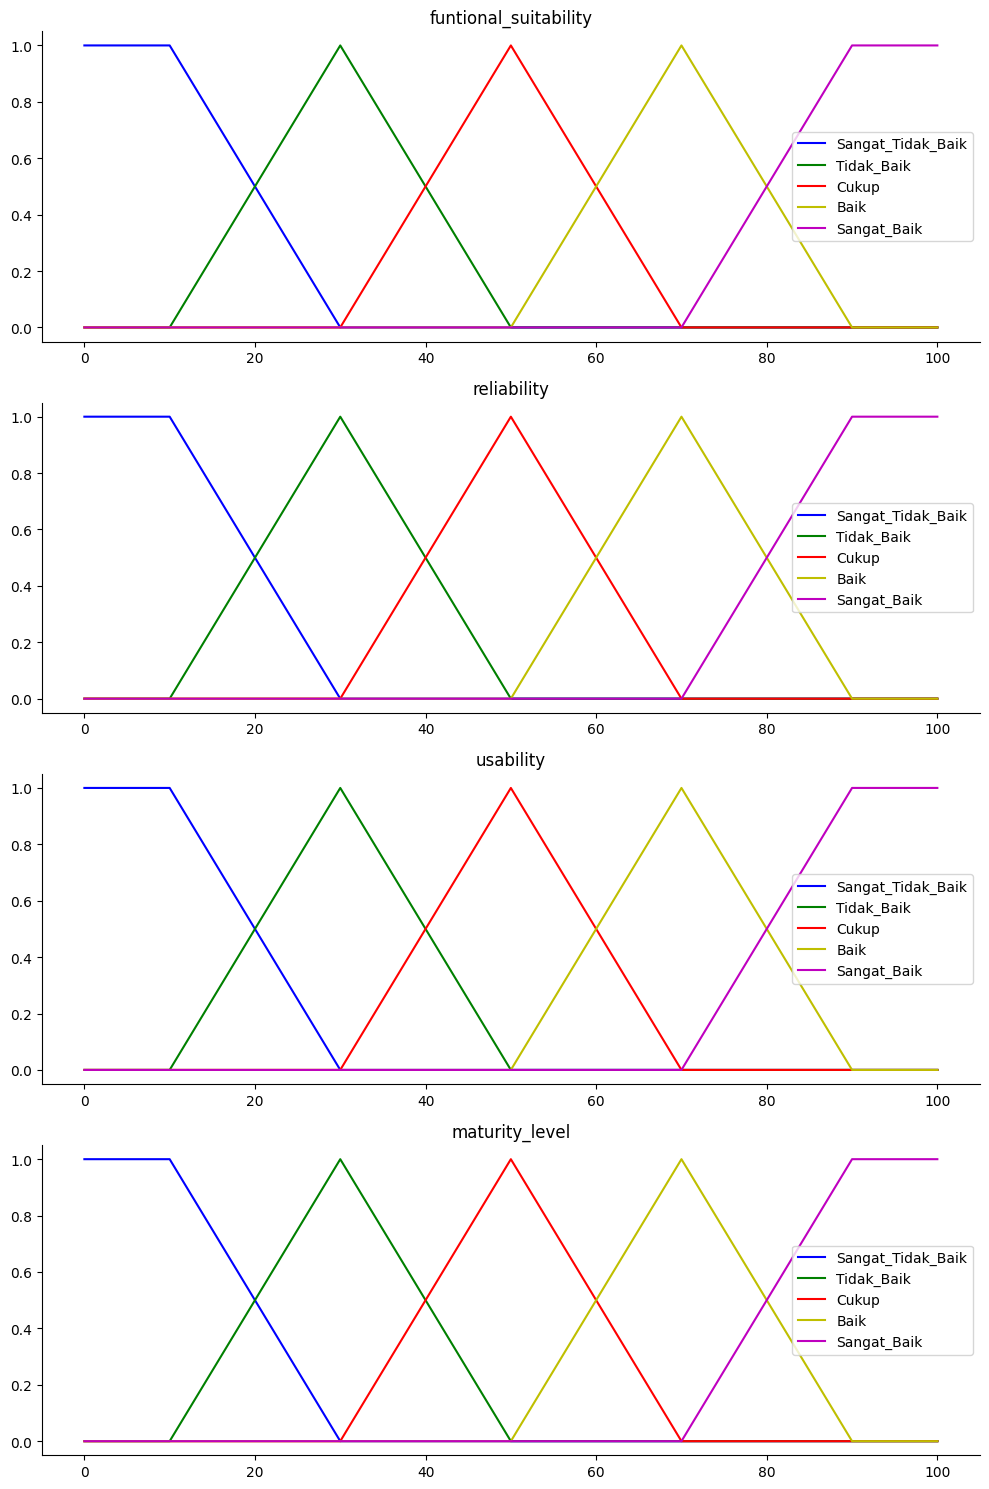

In [4]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2,ax3) = plt.subplots(nrows=4, figsize=(10, 15))
ax0.plot(universe, domain['Sangat_Tidak_Baik'], 'b', linewidth=1.5, label='Sangat_Tidak_Baik')
ax0.plot(universe, domain['Tidak_Baik'], 'g', linewidth=1.5, label='Tidak_Baik')
ax0.plot(universe, domain['Cukup'], 'r', linewidth=1.5, label='Cukup')
ax0.plot(universe, domain['Baik'], 'y', linewidth=1.5, label='Baik')
ax0.plot(universe, domain['Sangat_Baik'], 'm', linewidth=1.5, label='Sangat_Baik')
ax0.set_title('funtional_suitability')
ax0.legend()

ax1.plot(universe, domain['Sangat_Tidak_Baik'], 'b', linewidth=1.5, label='Sangat_Tidak_Baik')
ax1.plot(universe, domain['Tidak_Baik'], 'g', linewidth=1.5, label='Tidak_Baik')
ax1.plot(universe, domain['Cukup'], 'r', linewidth=1.5, label='Cukup')
ax1.plot(universe, domain['Baik'], 'y', linewidth=1.5, label='Baik')
ax1.plot(universe, domain['Sangat_Baik'], 'm', linewidth=1.5, label='Sangat_Baik')
ax1.set_title('reliability')
ax1.legend()

ax2.plot(universe, domain['Sangat_Tidak_Baik'], 'b', linewidth=1.5, label='Sangat_Tidak_Baik')
ax2.plot(universe, domain['Tidak_Baik'], 'g', linewidth=1.5, label='Tidak_Baik')
ax2.plot(universe, domain['Cukup'], 'r', linewidth=1.5, label='Cukup')
ax2.plot(universe, domain['Baik'], 'y', linewidth=1.5, label='Baik')
ax2.plot(universe, domain['Sangat_Baik'], 'm', linewidth=1.5, label='Sangat_Baik')
ax2.set_title('usability')
ax2.legend()

ax3.plot(universe, domain['Sangat_Tidak_Baik'], 'b', linewidth=1.5, label='Sangat_Tidak_Baik')
ax3.plot(universe, domain['Tidak_Baik'], 'g', linewidth=1.5, label='Tidak_Baik')
ax3.plot(universe, domain['Cukup'], 'r', linewidth=1.5, label='Cukup')
ax3.plot(universe, domain['Baik'], 'y', linewidth=1.5, label='Baik')
ax3.plot(universe, domain['Sangat_Baik'], 'm', linewidth=1.5, label='Sangat_Baik')
ax3.set_title('maturity_level')
ax3.legend()


# Turn off top/right axes
for ax in (ax0, ax1, ax2,ax3):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()

plt.tight_layout()


In [5]:
def membership_function(value):
  result = {}
  result['Sangat_Tidak_Baik'] = fuzz.interp_membership(universe, domain['Sangat_Tidak_Baik'], value)
  result['Tidak_Baik'] = fuzz.interp_membership(universe, domain['Tidak_Baik'], value)
  result['Cukup'] = fuzz.interp_membership(universe, domain['Cukup'], value)
  result['Baik'] = fuzz.interp_membership(universe, domain['Baik'], value)
  result['Sangat_Baik'] = fuzz.interp_membership(universe, domain['Sangat_Baik'], value)

  return result

In [12]:
funtional_suitability = 67
reliability = 94
usability = 95

In [13]:
funtional_suitability_sim = membership_function(funtional_suitability)
reliability_sim = membership_function(reliability)
usability_sim = membership_function(usability)

In [14]:
# Rule Evaluation
active_rule1 = np.fmin(np.fmin(funtional_suitability_sim["Sangat_Baik"],        np.fmax(usability_sim["Sangat_Baik"],       reliability_sim["Sangat_Baik"])),       domain['Sangat_Baik'])
active_rule2 = np.fmin(np.fmin(funtional_suitability_sim['Baik'],               np.fmax(usability_sim["Sangat_Baik"],       reliability_sim["Sangat_Baik"])),       domain['Sangat_Baik'])
active_rule3 = np.fmin(np.fmin(funtional_suitability_sim["Cukup"],              np.fmax(usability_sim['Baik'],              reliability_sim['Sangat_Baik'])),       domain['Baik'])
active_rule4 = np.fmin(np.fmin(funtional_suitability_sim["Sangat_Tidak_Baik"],  np.fmax(usability_sim["Sangat_Baik"],       reliability_sim["Baik"])),              domain['Cukup'])
active_rule5 = np.fmin(np.fmin(funtional_suitability_sim["Tidak_Baik"],         np.fmax(usability_sim["Cukup"],             reliability_sim["Cukup"])),             domain['Tidak_Baik'])
active_rule6 = np.fmin(np.fmin(funtional_suitability_sim["Sangat_Baik"],        np.fmax(usability_sim['Baik'],              reliability_sim['Tidak_Baik'])),        domain['Baik'])
active_rule7 = np.fmin(np.fmin(funtional_suitability_sim['Baik'],               np.fmax(usability_sim["Tidak_Baik"],        reliability_sim["Sangat_Tidak_Baik"])), domain['Tidak_Baik'])
active_rule8 = np.fmin(np.fmin(funtional_suitability_sim["Cukup"],              np.fmax(usability_sim["Sangat_Tidak_Baik"], reliability_sim["Sangat_Baik"])),       domain['Tidak_Baik'])

# Rule Activation
maturity_Tidak_Baik           = np.fmax(active_rule5, active_rule7)
maturity_Cukup                = np.fmax(active_rule4, active_rule8)
maturity_Baik                 = np.fmax(active_rule3, active_rule6)
maturity_Sangat_Baik          = np.fmax(active_rule1, active_rule2)


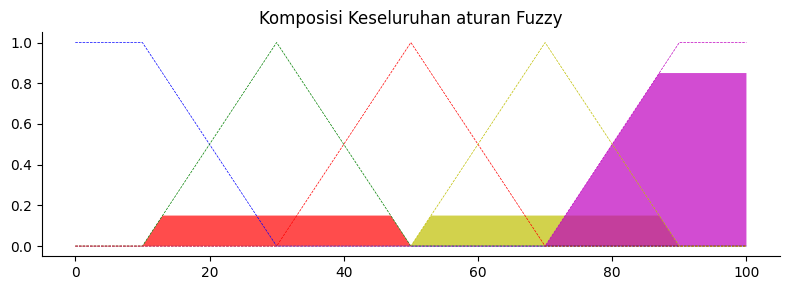

In [15]:
# Visualize this

fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(universe, domain['Sangat_Tidak_Baik'], 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(universe, maturity_level0, maturity_Tidak_Baik, facecolor='g', alpha=0.7)
ax0.plot(universe, domain['Tidak_Baik'], 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(universe, maturity_level0, maturity_Cukup, facecolor='r', alpha=0.7)
ax0.plot(universe, domain['Cukup'], 'r', linewidth=0.5, linestyle='--')

ax0.fill_between(universe, maturity_level0, maturity_Baik, facecolor='y', alpha=0.7)
ax0.plot(universe, domain['Baik'], 'y', linewidth=0.5, linestyle='--')

ax0.fill_between(universe, maturity_level0, maturity_Sangat_Baik, facecolor='m', alpha=0.7)
ax0.plot(universe, domain['Sangat_Baik'], 'm', linewidth=0.5, linestyle='--')

ax0.set_title('Komposisi Keseluruhan aturan Fuzzy')
# Turn off top/right axes
for ax in (ax0,):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
plt.tight_layout()


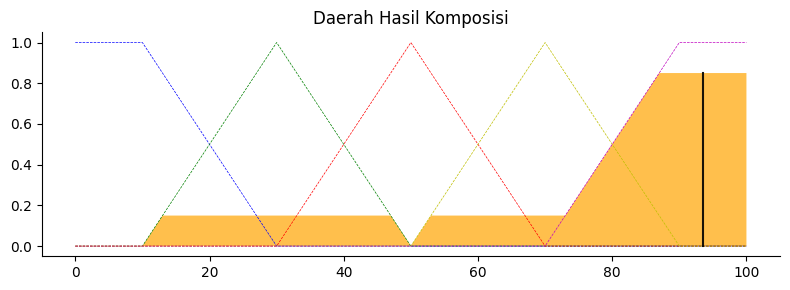

In [16]:
# Aggregate all three output membership functions together
aggregated = np.fmax(maturity_Tidak_Baik,np.fmax(maturity_Cukup, np.fmax(maturity_Baik, maturity_Sangat_Baik)))
# Calculate defuzzified result
maturity_level = fuzz.defuzz(universe, aggregated, 'mom')
maturity_level_activation = fuzz.interp_membership(universe, aggregated, maturity_level) # for plot
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(universe, domain['Sangat_Tidak_Baik'], 'b', linewidth=0.5, linestyle='--', )
ax0.plot(universe, domain['Tidak_Baik'], 'g', linewidth=0.5, linestyle='--')
ax0.plot(universe, domain['Cukup'], 'r', linewidth=0.5, linestyle='--')
ax0.plot(universe, domain['Baik'], 'y', linewidth=0.5, linestyle='--')
ax0.plot(universe, domain['Sangat_Baik'], 'm', linewidth=0.5, linestyle='--')

ax0.fill_between(universe, maturity_level0, aggregated, facecolor='Orange', alpha=0.7)

ax0.plot([maturity_level, maturity_level], [0, maturity_level_activation], 'k', linewidth=1.5, alpha=0.9)

ax0.set_title('Daerah Hasil Komposisi')
# Turn off top/right axes
for ax in (ax0,):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
plt.tight_layout()

In [17]:
maturity_level

93.5